# 11.LSTM

### Import Required Libraries

In [1]:

# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

### Load IMDB Dataset and  Data Visualization: Sentiment Distribution

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<ipython-input-2-c8de6efce5db>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train.astype(str), palette=['red', 'green'])


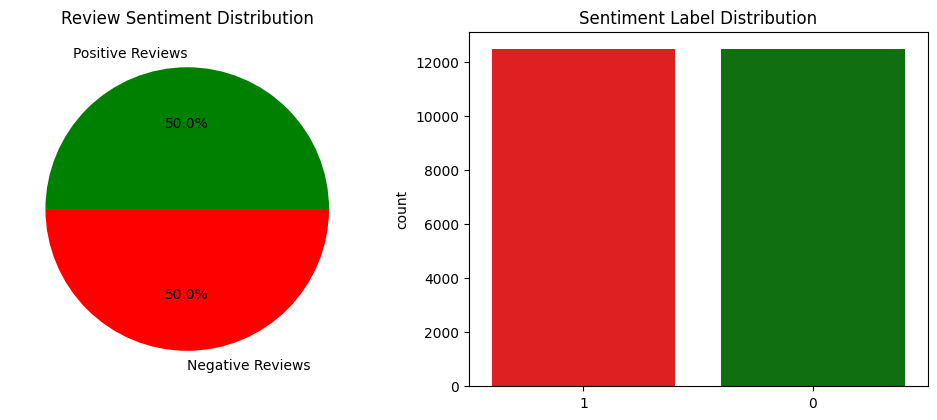

In [2]:
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Data Visualization: Sentiment and Label Distribution
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.pie([np.sum(y_train == 1), np.sum(y_train == 0)], labels=['Positive Reviews', 'Negative Reviews'],
        autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Review Sentiment Distribution')

plt.subplot(2, 2, 2)
# Fixed issue by removing 'hue' and directly plotting the count of labels
sns.countplot(x=y_train.astype(str), palette=['red', 'green'])
plt.title('Sentiment Label Distribution')
plt.tight_layout()
plt.show()


 ### Preprocess Data: Padding Sequences

In [3]:

# Pad sequences to ensure uniform input size
max_len = 100
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

### Define LSTM Model

In [4]:
# Build LSTM Model
def build_lstm_model():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=max_len),
        LSTM(units=128, return_sequences=True, dropout=0.2),  # Removed recurrent_dropout
        LSTM(units=64, return_sequences=False, dropout=0.2),  # Removed recurrent_dropout
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer="adam", loss='binary_crossentropy',
                  metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
    return model

# Initialize and summarize the model
lstm_model = build_lstm_model()
lstm_model.summary()  # Moved before training logs


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###  Set Callbacks and Train the Model

In [5]:

# Callbacks: EarlyStopping & ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)  # Added Learning Rate Scheduler

# Train the model
history = lstm_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1, callbacks=[early_stopping, reduce_lr])


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 106s 287ms/step - accuracy: 0.7128 - loss: 1.0741 - precision: 0.7131 - recall: 0.7122 - val_accuracy: 0.8472 - val_loss: 0.4437 - val_precision: 0.8277 - val_recall: 0.8671 - learning_rate: 0.0010
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 129s 251ms/step - accuracy: 0.8895 - loss: 0.3019 - precision: 0.8858 - recall: 0.8928 - val_accuracy: 0.8152 - val_loss: 0.4077 - val_precision: 0.7542 - val_recall: 0.9212 - learning_rate: 0.0010
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 137s 238ms/step - accuracy: 0.9276 - loss: 0.2031 - precision: 0.9274 - recall: 0.9289 - val_accuracy: 0.8284 - val_loss: 0.4510 - val_precision: 0.8034 - val_recall: 0.8581 - learning_rate: 0.0010
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 144s 243ms/step - accuracy: 0.9503 - loss: 0.1526 - precision: 0.9511 - recall: 0.9500 - val_accuracy: 0.8228 - val_loss: 0.5628 - val_precision: 0.8606 - val_recall: 0.7596 - learning_rate: 0.0010
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 87s 248m

###  Evaluate Model Performance

In [10]:
# Evaluate model on test data
results = lstm_model.evaluate(x_test, y_test, verbose=1)
print("Test Metrics:")
for metric_name, metric_value in zip(lstm_model.metrics_names, results):
    print(f"{metric_name}: {metric_value:.3f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8183 - loss: 0.4018 - precision: 0.7607 - recall: 0.9209
Test Metrics:
loss: 0.399
compile_metrics: 0.821


### Predictions and Classification Report

In [6]:
# Predictions & Classification Report
y_pred_prob_lstm = lstm_model.predict(x_test)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype("int32")
print(classification_report(y_test, y_pred_lstm))


782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step
              precision    recall  f1-score   support

           0       0.90      0.72      0.80     12500
           1       0.77      0.92      0.84     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000



### Confusion Matrix

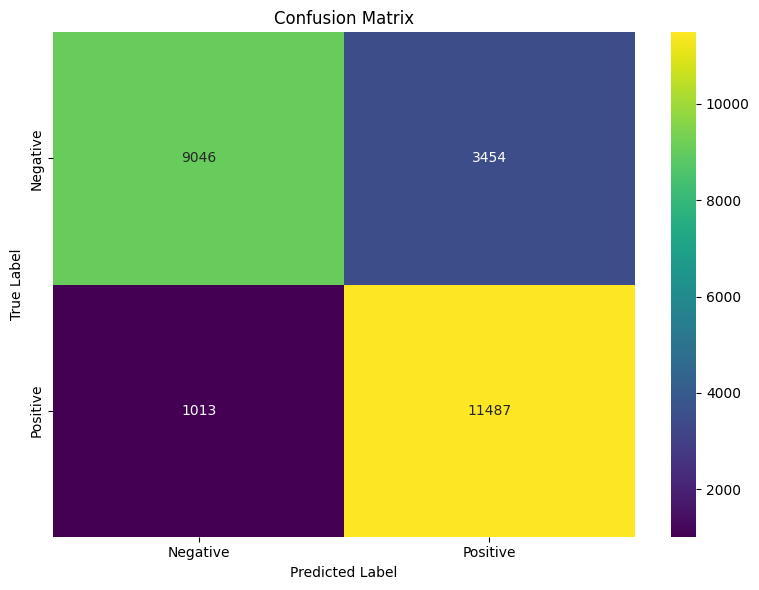

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


### ROC Curve

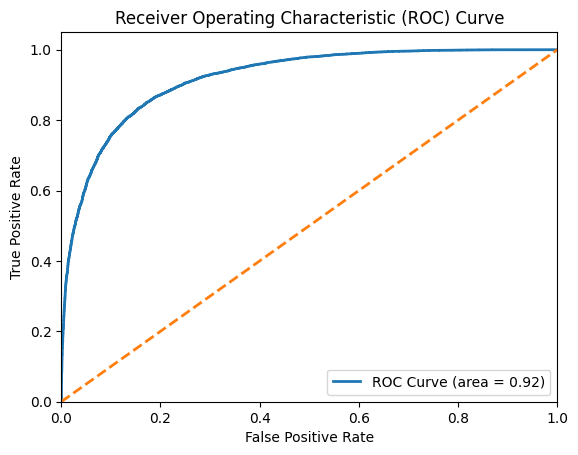

In [8]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lstm)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, lw=2, label="ROC Curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

###  Training & Validation Loss and Accuracy

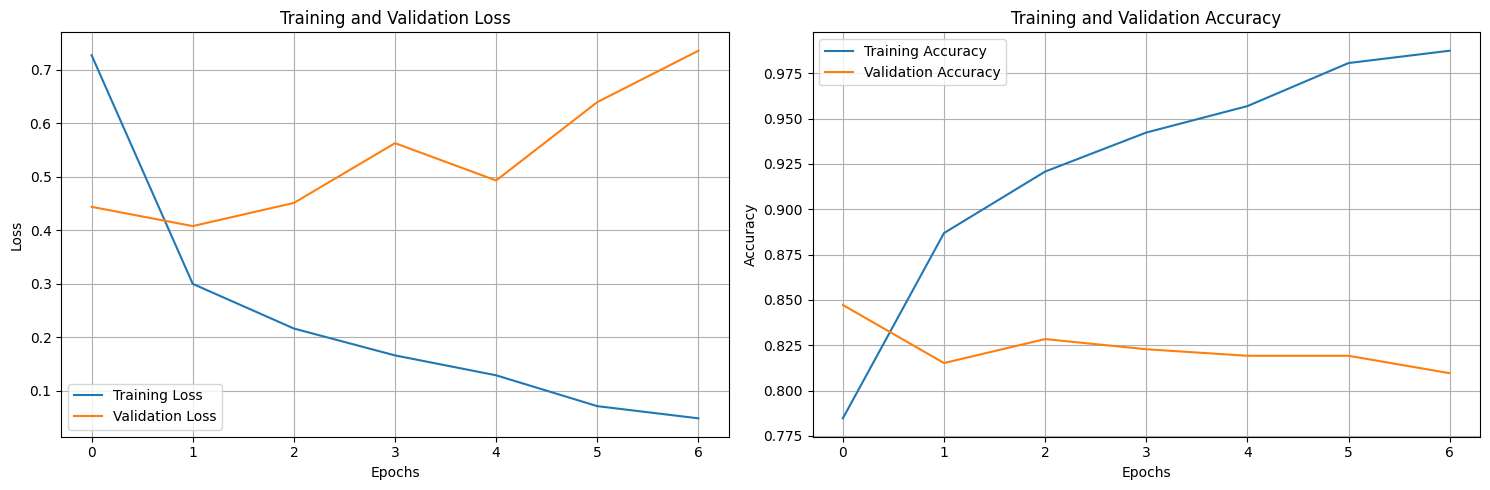

In [9]:
# Training & Validation Loss and Accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
